In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = sns.load_dataset("iris")

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# data scaling
# apply pca
# get new features

In [6]:
# Separate features and target
X = data.drop("species", axis=1)  # only numeric features
y = data["species"]

# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# (Optional) Combine scaled features with the target column
scaled_data = pd.concat([X_scaled_df, y], axis=1)

print(scaled_data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.900681     1.019004     -1.340227    -1.315444  setosa
1     -1.143017    -0.131979     -1.340227    -1.315444  setosa
2     -1.385353     0.328414     -1.397064    -1.315444  setosa
3     -1.506521     0.098217     -1.283389    -1.315444  setosa
4     -1.021849     1.249201     -1.340227    -1.315444  setosa


In [7]:
# Apply PCA (reduce to 2 components for visualization)
pca = PCA()
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [8]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [9]:
new_features = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [10]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [11]:
new_truncated_feature = new_features[:,:2]

In [12]:
data["species"] = data["species"].map({"setosa" : 1, "versicolor" : 2, "virginica" : 3})

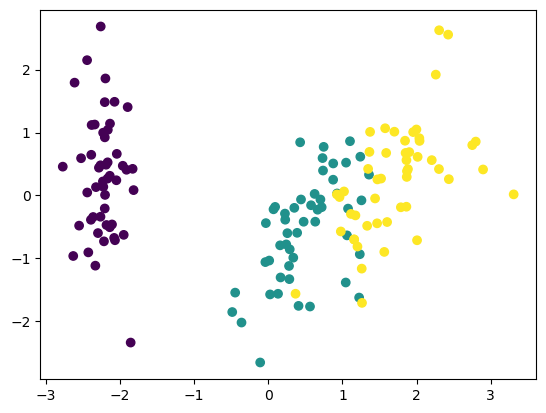

In [13]:
plt.scatter(new_truncated_feature[:,0] , new_truncated_feature[:,1], c=data["species"])

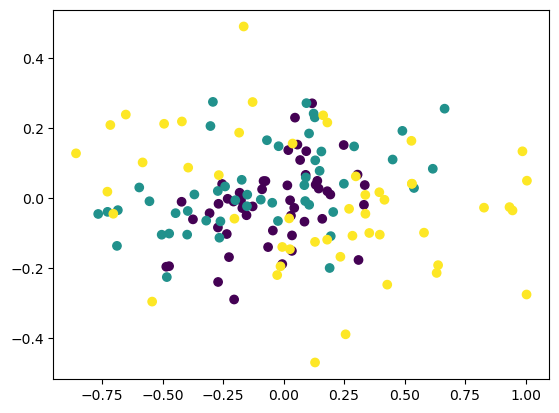

In [14]:
plt.scatter(new_features[:,2] , new_features[:,3], c=data["species"])
# we will get improper scattering using very wighted data which is of Z2 and Z3

### Supervised

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [18]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
111,6.4,2.7,5.3,1.9
49,5.0,3.3,1.4,0.2
101,5.8,2.7,5.1,1.9
36,5.5,3.5,1.3,0.2
9,4.9,3.1,1.5,0.1
...,...,...,...,...
141,6.9,3.1,5.1,2.3
100,6.3,3.3,6.0,2.5
145,6.7,3.0,5.2,2.3
46,5.1,3.8,1.6,0.2


In [19]:
# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
pca.fit(x_train_scaled)
pca.explained_variance_ratio_

array([0.72677278, 0.23332815])

In [20]:
x_pca_train = pca.fit_transform(x_train_scaled)
x_pca_test = pca.transform(x_test_scaled)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [22]:
model = LogisticRegression()
model.fit(x_pca_train, y_train)
y_pred = model.predict(x_pca_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.78      0.88      0.82         8
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [23]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.78      0.88      0.82         8
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [24]:
np.sqrt(5)

2.23606797749979

In [25]:
1 / (2.23*3.16)

0.1419083839473236